# Download Kaggle 

https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023/code


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018")

print("Path to dataset files:", path)


Path to dataset files: /Users/solvibjornsson/.cache/kagglehub/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018/versions/1


In [2]:
import pandas as pd
df_gnn = pd.read_csv(path+'/2014.csv')

In [3]:
df_gnn = df_gnn[~df_gnn[["ORIGIN", "DEST"]].isin(["ISN"]).any(axis=1)].reset_index(drop=True)

In [4]:
top_10_airports = (
    df_gnn[["ORIGIN", "DEST"]]
      .stack()            # long Series of all endpoints
      .value_counts()
      .head(50)
      .index
      .tolist()
)
print("Top-20 airports:", top_10_airports)
# 2) Keep only flights fully inside that set
# ------------------------------------------------------------------
df_gnn = (
    df_gnn[df_gnn["ORIGIN"].isin(top_10_airports) & df_gnn["DEST"].isin(top_10_airports)]
          .reset_index(drop=True)
)
print("df_gnn rows after filter:", len(df_gnn))

Top-20 airports: ['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'SFO', 'PHX', 'LAS', 'CLT', 'BOS', 'MCO', 'EWR', 'SEA', 'SLC', 'LGA', 'DTW', 'MSP', 'JFK', 'BWI', 'MDW', 'MIA', 'SAN', 'PHL', 'DCA', 'TPA', 'FLL', 'HOU', 'IAD', 'BNA', 'PDX', 'STL', 'DAL', 'HNL', 'MCI', 'OAK', 'AUS', 'SJC', 'SMF', 'MSY', 'SNA', 'RDU', 'CLE', 'SAT', 'MKE', 'IND', 'PIT', 'CMH', 'RSW', 'SJU']
df_gnn rows after filter: 3541995


In [5]:
df_gnn = df_gnn.drop(columns=["Unnamed: 27"], errors="ignore").copy()

# b) Uniform dtypes for key numerics (coerce bad strings → NaN)
numeric_cols = [
    "CRS_DEP_TIME","CRS_ARR_TIME","CRS_ELAPSED_TIME","DISTANCE",
    "ARR_DELAY","DEP_DELAY","TAXI_OUT","TAXI_IN","AIR_TIME",
]
for col in numeric_cols:
    df_gnn[col] = pd.to_numeric(df_gnn[col], errors="coerce")

# c) Parse FL_DATE
df_gnn["FL_DATE"] = pd.to_datetime(df_gnn["FL_DATE"], errors="coerce")
df = df_gnn

# Imports

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df.shape

(3541995, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541995 entries, 0 to 3541994
Data columns (total 27 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [9]:
print(len(df.ORIGIN.unique()))
print(len(df.DEST.unique()))

50
50


In [10]:
df.OP_CARRIER.unique()

array(['AA', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'VX', 'WN', 'UA', 'US',
       'AS', 'B6', 'DL'], dtype=object)

# Pre-Processing the Data

In [11]:
df.isnull().sum()/df.shape[0]*100

FL_DATE                 0.000000
OP_CARRIER              0.000000
OP_CARRIER_FL_NUM       0.000000
ORIGIN                  0.000000
DEST                    0.000000
CRS_DEP_TIME            0.000000
DEP_TIME                1.680635
DEP_DELAY               1.680635
TAXI_OUT                1.729421
WHEELS_OFF              1.729421
WHEELS_ON               1.764740
TAXI_IN                 1.764740
CRS_ARR_TIME            0.000000
ARR_TIME                1.764740
ARR_DELAY               1.969399
CANCELLED               0.000000
CANCELLATION_CODE      98.263803
DIVERTED                0.000000
CRS_ELAPSED_TIME        0.000113
ACTUAL_ELAPSED_TIME     1.969399
AIR_TIME                1.969399
DISTANCE                0.000000
CARRIER_DELAY          78.412561
WEATHER_DELAY          78.412561
NAS_DELAY              78.412561
SECURITY_DELAY         78.412561
LATE_AIRCRAFT_DELAY    78.412561
dtype: float64

Lets delete the columuns with large missing values

In [12]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 59528
DEP_DELAY                59528
TAXI_OUT                 61256
WHEELS_OFF               61256
WHEELS_ON                62507
TAXI_IN                  62507
CRS_ARR_TIME                 0
ARR_TIME                 62507
ARR_DELAY                69756
CANCELLED                    0
CANCELLATION_CODE      3480499
DIVERTED                     0
CRS_ELAPSED_TIME             4
ACTUAL_ELAPSED_TIME      69756
AIR_TIME                 69756
DISTANCE                     0
CARRIER_DELAY          2777369
WEATHER_DELAY          2777369
NAS_DELAY              2777369
SECURITY_DELAY         2777369
LATE_AIRCRAFT_DELAY    2777369
dtype: int64

Now lets delete the rows with the missing values

In [13]:
df_cleaned = df

In [14]:
df_cleaned.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 59528
DEP_DELAY                59528
TAXI_OUT                 61256
WHEELS_OFF               61256
WHEELS_ON                62507
TAXI_IN                  62507
CRS_ARR_TIME                 0
ARR_TIME                 62507
ARR_DELAY                69756
CANCELLED                    0
CANCELLATION_CODE      3480499
DIVERTED                     0
CRS_ELAPSED_TIME             4
ACTUAL_ELAPSED_TIME      69756
AIR_TIME                 69756
DISTANCE                     0
CARRIER_DELAY          2777369
WEATHER_DELAY          2777369
NAS_DELAY              2777369
SECURITY_DELAY         2777369
LATE_AIRCRAFT_DELAY    2777369
dtype: int64

In [15]:
# Check how many duplicated rows exist
df_cleaned.duplicated().sum()

0

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541995 entries, 0 to 3541994
Data columns (total 27 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [17]:
df_cleaned.describe()

,FL_DATE,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,3541995,3.541995e+06,3.541995e+06,3.482467e+06,3.482467e+06,3.480739e+06,3.480739e+06,3.479488e+06,3.479488e+06,3.541995e+06,...,3.541995e+06,3.541991e+06,3.472239e+06,3.472239e+06,3.541995e+06,764626.000000,764626.000000,764626.000000,764626.000000,764626.000000
mean,2014-07-02 00:52:23.286198272,1.757688e+03,1.322442e+03,1.331592e+03,1.100469e+01,1.627752e+01,1.354334e+03,1.493150e+03,7.392118e+00,1.515289e+03,...,2.332019e-03,1.574520e+02,1.538055e+02,1.301473e+02,9.564088e+02,16.688929,2.382966,13.969870,0.055103,22.493249
min,2014-01-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,-1.120000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.400000e+01,2.400000e+01,7.000000e+00,2.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014-04-03 00:00:00,6.030000e+02,9.150000e+02,9.190000e+02,-4.000000e+00,1.100000e+01,9.340000e+02,1.111000e+03,4.000000e+00,1.125000e+03,...,0.000000e+00,9.700000e+01,9.500000e+01,7.200000e+01,4.560000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014-07-02 00:00:00,1.390000e+03,1.315000e+03,1.325000e+03,-1.000000e+00,1.400000e+01,1.338000e+03,1.525000e+03,6.000000e+00,1.535000e+03,...,0.000000e+00,1.400000e+02,1.370000e+02,1.140000e+02,8.340000e+02,3.000000,0.000000,3.000000,0.000000,5.000000
75%,2014-09-30 00:00:00,2.305000e+03,1.722000e+03,1.734000e+03,1.100000e+01,1.900000e+01,1.749000e+03,1.922000e+03,9.000000e+00,1.925000e+03,...,0.000000e+00,1.950000e+02,1.920000e+02,1.660000e+02,1.237000e+03,17.000000,0.000000,18.000000,0.000000,28.000000
max,2014-12-31 00:00:00,8.444000e+03,2.359000e+03,2.400000e+03,2.402000e+03,2.170000e+02,2.400000e+03,2.400000e+03,2.460000e+02,2.359000e+03,...,1.000000e+00,7.180000e+02,7.750000e+02,7.060000e+02,4.983000e+03,2402.000000,1288.000000,1439.000000,222.000000,1437.000000
std,NaN,1.505502e+03,4.706167e+02,4.854725e+02,3.651713e+01,9.080401e+00,4.869123e+02,5.133083e+02,5.170650e+00,4.927324e+02,...,4.823465e-02,7.816341e+01,7.795621e+01,7.591960e+01,6.371664e+02,42.113440,17.764577,27.347846,1.611773,40.666440


lets drop Cancelled and Diverted columns

In [18]:
df_cleaned.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2014-01-01,AA,2378,MIA,TPA,2225,2220.0,-5.0,14.0,2234.0,...,0.0,60.0,55.0,37.0,204.0,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,EV,2500,DFW,HOU,2105,NaN,NaN,NaN,NaN,...,0.0,60.0,NaN,NaN,247.0,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,EV,2509,DFW,HOU,1650,1654.0,4.0,14.0,1708.0,...,0.0,65.0,62.0,42.0,247.0,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,EV,2509,HOU,DFW,1825,NaN,NaN,NaN,NaN,...,0.0,70.0,NaN,NaN,247.0,NaN,NaN,NaN,NaN,NaN
4,2014-01-01,EV,2564,DFW,HOU,1300,1337.0,37.0,11.0,1348.0,...,0.0,65.0,61.0,46.0,247.0,0.0,0.0,0.0,0.0,33.0


Lets look at the time cols

In [19]:
df_cleaned[["FL_DATE","CRS_DEP_TIME", "DEP_TIME", "WHEELS_OFF", "WHEELS_ON", "CRS_ARR_TIME", "ARR_TIME", "DEP_DELAY", "ARR_DELAY"]]


,FL_DATE,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,ARR_TIME,DEP_DELAY,ARR_DELAY
0,2014-01-01,2225,2220.0,2234.0,2311.0,2325,2315.0,-5.0,-10.0
1,2014-01-01,2105,NaN,NaN,NaN,2205,NaN,NaN,NaN
2,2014-01-01,1650,1654.0,1708.0,1750.0,1755,1756.0,4.0,1.0
3,2014-01-01,1825,NaN,NaN,NaN,1935,NaN,NaN,NaN
4,2014-01-01,1300,1337.0,1348.0,1434.0,1405,1438.0,37.0,33.0
...,...,...,...,...,...,...,...,...,...
3541990,2014-12-31,1900,1852.0,1905.0,2032.0,2053,2044.0,-8.0,-9.0
3541991,2014-12-31,1500,1452.0,1511.0,1622.0,1643,1625.0,-8.0,-18.0
3541992,2014-12-31,1735,1933.0,1940.0,1944.0,1810,2030.0,118.0,140.0
3541993,2014-12-31,640,635.0,712.0,811.0,820,816.0,-5.0,-4.0


This table provides a snapshot of flight schedule and delay information. Each row represents a single flight, showing both scheduled and actual time-related fields.

| Column         | Description                                                        |
| -------------- | ------------------------------------------------------------------ |
| `FL_DATE`      | The calendar date of the flight.                                   |
| `CRS_DEP_TIME` | Scheduled departure time in `hhmm` format (e.g., 1155 = 11:55 AM). |
| `DEP_TIME`     | Actual departure time, also in `hhmm`.                             |
| `WHEELS_OFF`   | Time when the aircraft took off (left the runway).                 |
| `WHEELS_ON`    | Time when the aircraft landed (touched down).                      |
| `CRS_ARR_TIME` | Scheduled arrival time in `hhmm`.                                  |
| `ARR_TIME`     | Actual arrival time.                                               |
| `DEP_DELAY`    | Departure delay in minutes (negative = early departure).           |
| `ARR_DELAY`    | Arrival delay in minutes (negative = early arrival).               |


In [20]:
# converting column to datetime
df_cleaned['FL_DATE'] = pd.to_datetime(df_cleaned['FL_DATE'])

# seperating year, month & day
df_cleaned['FL_YEAR'] = df_cleaned['FL_DATE'].dt.year
df_cleaned['FL_MONTH'] = df_cleaned['FL_DATE'].dt.month
df_cleaned['FL_DAY'] = df_cleaned['FL_DATE'].dt.day

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541995 entries, 0 to 3541994
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [21]:
time_features = ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
                 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON','TAXI_IN',
                 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
                 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME']

df_cleaned[time_features]

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME
0,2225,2220.0,-5.0,14.0,2234.0,2311.0,4.0,2325,2315.0,-10.0,60.0,55.0,37.0
1,2105,NaN,NaN,NaN,NaN,NaN,NaN,2205,NaN,NaN,60.0,NaN,NaN
2,1650,1654.0,4.0,14.0,1708.0,1750.0,6.0,1755,1756.0,1.0,65.0,62.0,42.0
3,1825,NaN,NaN,NaN,NaN,NaN,NaN,1935,NaN,NaN,70.0,NaN,NaN
4,1300,1337.0,37.0,11.0,1348.0,1434.0,4.0,1405,1438.0,33.0,65.0,61.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541990,1900,1852.0,-8.0,13.0,1905.0,2032.0,12.0,2053,2044.0,-9.0,113.0,112.0,87.0
3541991,1500,1452.0,-8.0,19.0,1511.0,1622.0,3.0,1643,1625.0,-18.0,103.0,93.0,71.0
3541992,1735,1933.0,118.0,7.0,1940.0,1944.0,46.0,1810,2030.0,140.0,95.0,117.0,64.0
3541993,640,635.0,-5.0,37.0,712.0,811.0,5.0,820,816.0,-4.0,100.0,101.0,59.0


In [22]:
from datetime import datetime, timedelta, time

def hhmm_to_time(val):
    if pd.isna(val):
        return pd.NaT

    # Skip if already converted
    if isinstance(val, time):
        return val

    val = int(val)

    # Handle 2400 as 00:00
    if val == 2400:
        return time(0, 0)

    hour = val // 100
    minute = val % 100
    return time(hour, minute)


hhmm_features = ['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME']
for col in hhmm_features:
    df_cleaned[col] = df_cleaned[col].apply(hhmm_to_time)



In [23]:
df_cleaned[["CRS_DEP_TIME", "DEP_TIME", "WHEELS_OFF", "WHEELS_ON", "CRS_ARR_TIME", "ARR_TIME"]]

,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,ARR_TIME
0,22:25:00,22:20:00,22:34:00,23:11:00,23:25:00,23:15:00
1,21:05:00,NaT,NaT,NaT,22:05:00,NaT
2,16:50:00,16:54:00,17:08:00,17:50:00,17:55:00,17:56:00
3,18:25:00,NaT,NaT,NaT,19:35:00,NaT
4,13:00:00,13:37:00,13:48:00,14:34:00,14:05:00,14:38:00
...,...,...,...,...,...,...
3541990,19:00:00,18:52:00,19:05:00,20:32:00,20:53:00,20:44:00
3541991,15:00:00,14:52:00,15:11:00,16:22:00,16:43:00,16:25:00
3541992,17:35:00,19:33:00,19:40:00,19:44:00,18:10:00,20:30:00
3541993,06:40:00,06:35:00,07:12:00,08:11:00,08:20:00,08:16:00


In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541995 entries, 0 to 3541994
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         object        
 6   DEP_TIME             object        
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           object        
 10  WHEELS_ON            object        
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         object        
 13  ARR_TIME             object        
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [25]:
# Find rows where arrival time is earlier than departure time → means arrival is on the next day
next_day_arrivals = df_cleaned[df_cleaned["CRS_ARR_TIME"] < df_cleaned["CRS_DEP_TIME"]]

# Count them
print(f"Number of next-day arrivals: {next_day_arrivals.shape[0]}")


Number of next-day arrivals: 101026


In [26]:
from datetime import datetime, timedelta

def create_datetime(row, time_col, shift_day=False):
    if pd.isna(row[time_col]):
        return pd.NaT
    dt = datetime.combine(row["FL_DATE"], row[time_col])
    if shift_day:
        dt += timedelta(days=1)
    return dt

In [27]:
# Create departure datetime
df_cleaned["CRS_DEP_DATETIME"] = df_cleaned.apply(lambda row: create_datetime(row, "CRS_DEP_TIME"), axis=1)

# Create arrival datetime and shift day if arrival was before departure
df_cleaned["CRS_ARR_DATETIME"] = df_cleaned.apply(
    lambda row: create_datetime(row, "CRS_ARR_TIME", shift_day=row["CRS_ARR_TIME"] < row["CRS_DEP_TIME"]), axis=1
)



In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541995 entries, 0 to 3541994
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         object        
 6   DEP_TIME             object        
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           object        
 10  WHEELS_ON            object        
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         object        
 13  ARR_TIME             object        
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [29]:
# Find rows where arrival time is earlier than departure time → means arrival is on the next day
next_day_arrivals = df_cleaned[df_cleaned["CRS_ARR_TIME"] < df_cleaned["CRS_DEP_TIME"]]


next_day_arrivals[["FL_DATE", "CRS_DEP_TIME", "DEP_TIME", "WHEELS_OFF", "WHEELS_ON",  "CRS_ARR_TIME", "ARR_TIME"]]

,FL_DATE,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,ARR_TIME
148,2014-01-01,20:21:00,23:43:00,23:54:00,03:03:00,00:21:00,03:13:00
184,2014-01-01,22:01:00,22:16:00,22:32:00,01:20:00,00:33:00,01:25:00
220,2014-01-01,21:48:00,22:29:00,23:28:00,01:11:00,00:01:00,01:23:00
356,2014-01-01,22:05:00,NaT,NaT,NaT,01:23:00,NaT
594,2014-01-01,23:55:00,00:17:00,00:25:00,06:47:00,06:40:00,07:07:00
...,...,...,...,...,...,...,...
3541758,2014-12-31,16:25:00,16:23:00,16:38:00,06:47:00,06:55:00,06:58:00
3541763,2014-12-31,23:20:00,00:00:00,00:14:00,06:41:00,06:45:00,06:53:00
3541767,2014-12-31,22:50:00,22:48:00,23:05:00,06:00:00,06:30:00,06:06:00
3541803,2014-12-31,22:15:00,22:50:00,22:59:00,00:41:00,00:18:00,00:47:00


In [30]:
df_cleaned.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'FL_YEAR', 'FL_MONTH', 'FL_DAY', 'CRS_DEP_DATETIME',
       'CRS_ARR_DATETIME'],
      dtype='object')

In [31]:
df_cleaned["CRS_DEP_year"] = df_cleaned["CRS_DEP_DATETIME"].dt.year
df_cleaned["CRS_DEP_MONTH"] = df_cleaned["CRS_DEP_DATETIME"].dt.month
df_cleaned["CRS_DEP_WEEKDAY"] = df_cleaned["CRS_DEP_DATETIME"].dt.weekday  # Monday = 0
df_cleaned["CRS_DEP_HOUR"] = df_cleaned["CRS_DEP_DATETIME"].dt.hour
df_cleaned["CRS_DEP_MINUTE"] = df_cleaned["CRS_DEP_DATETIME"].dt.minute

df_cleaned["CRS_ARR_year"] = df_cleaned["CRS_ARR_DATETIME"].dt.year
df_cleaned["CRS_ARR_MONTH"] = df_cleaned["CRS_ARR_DATETIME"].dt.month
df_cleaned["CRS_ARR_WEEKDAY"] = df_cleaned["CRS_ARR_DATETIME"].dt.weekday
df_cleaned["CRS_ARR_HOUR"] = df_cleaned["CRS_ARR_DATETIME"].dt.hour
df_cleaned["CRS_ARR_MINUTE"] = df_cleaned["CRS_ARR_DATETIME"].dt.minute


In [32]:
df_cleaned

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_DEP_year,CRS_DEP_MONTH,CRS_DEP_WEEKDAY,CRS_DEP_HOUR,CRS_DEP_MINUTE,CRS_ARR_year,CRS_ARR_MONTH,CRS_ARR_WEEKDAY,CRS_ARR_HOUR,CRS_ARR_MINUTE
0,2014-01-01,AA,2378,MIA,TPA,22:25:00,22:20:00,-5.0,14.0,22:34:00,...,2014,1,2,22,25,2014,1,2,23,25
1,2014-01-01,EV,2500,DFW,HOU,21:05:00,NaT,NaN,NaN,NaT,...,2014,1,2,21,5,2014,1,2,22,5
2,2014-01-01,EV,2509,DFW,HOU,16:50:00,16:54:00,4.0,14.0,17:08:00,...,2014,1,2,16,50,2014,1,2,17,55
3,2014-01-01,EV,2509,HOU,DFW,18:25:00,NaT,NaN,NaN,NaT,...,2014,1,2,18,25,2014,1,2,19,35
4,2014-01-01,EV,2564,DFW,HOU,13:00:00,13:37:00,37.0,11.0,13:48:00,...,2014,1,2,13,0,2014,1,2,14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541990,2014-12-31,MQ,3535,JFK,CMH,19:00:00,18:52:00,-8.0,13.0,19:05:00,...,2014,12,2,19,0,2014,12,2,20,53
3541991,2014-12-31,MQ,3536,LGA,RDU,15:00:00,14:52:00,-8.0,19.0,15:11:00,...,2014,12,2,15,0,2014,12,2,16,43
3541992,2014-12-31,MQ,3541,CLE,ORD,17:35:00,19:33:00,118.0,7.0,19:40:00,...,2014,12,2,17,35,2014,12,2,18,10
3541993,2014-12-31,MQ,3552,RDU,LGA,06:40:00,06:35:00,-5.0,37.0,07:12:00,...,2014,12,2,6,40,2014,12,2,8,20


In [33]:
df_cleaned.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'FL_YEAR', 'FL_MONTH', 'FL_DAY', 'CRS_DEP_DATETIME', 'CRS_ARR_DATETIME',
       'CRS_DEP_year', 'CRS_DEP_MONTH', 'CRS_DEP_WEEKDAY', 'CRS_DEP_HOUR',
       'CRS_DEP_MINUTE', 'CRS_ARR_year', 'CRS_ARR_MONTH', 'CRS_ARR_WEEKDAY',
       'CRS_ARR_HOUR', 'CRS_ARR_MINUTE'],
      dtype='object')

# Visualizations

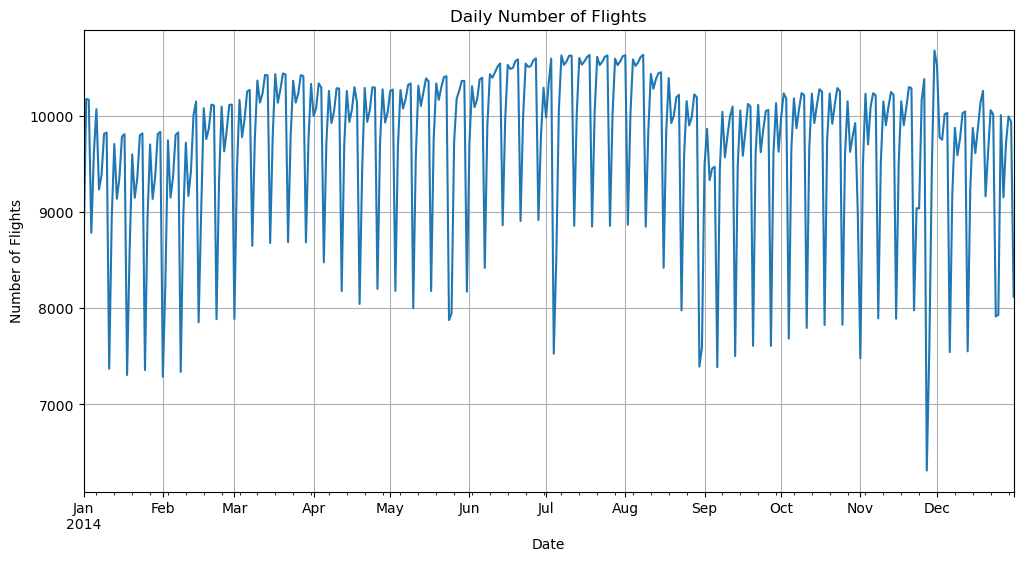

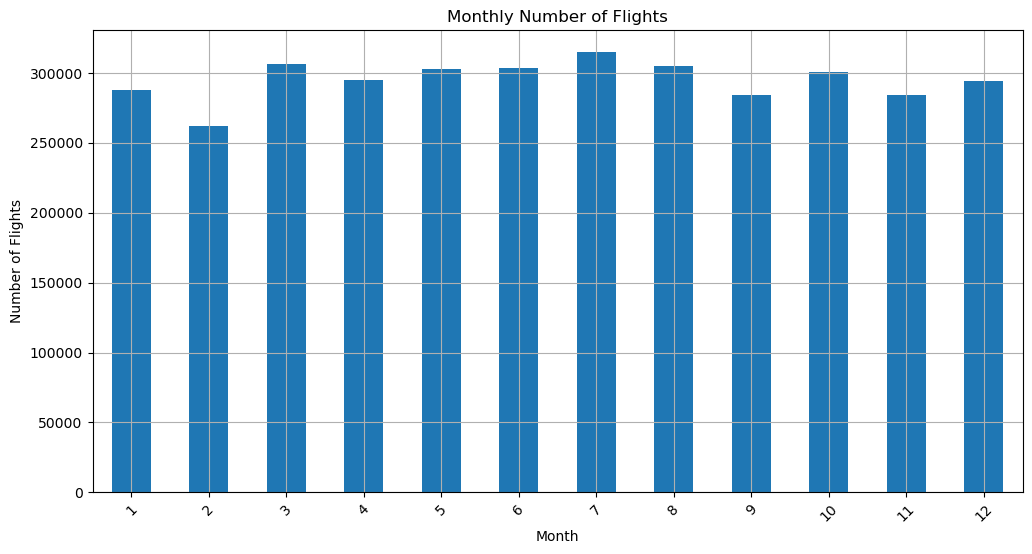

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = df_cleaned.copy()


# Daily flight count
daily_flights = df_viz.groupby('FL_DATE').size()

plt.figure(figsize=(12, 6))
daily_flights.plot()
plt.title('Daily Number of Flights')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()

# Monthly flight count
monthly_flights = df_viz.groupby('FL_MONTH').size()

plt.figure(figsize=(12, 6))
monthly_flights.plot(kind='bar')
plt.title('Monthly Number of Flights')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()





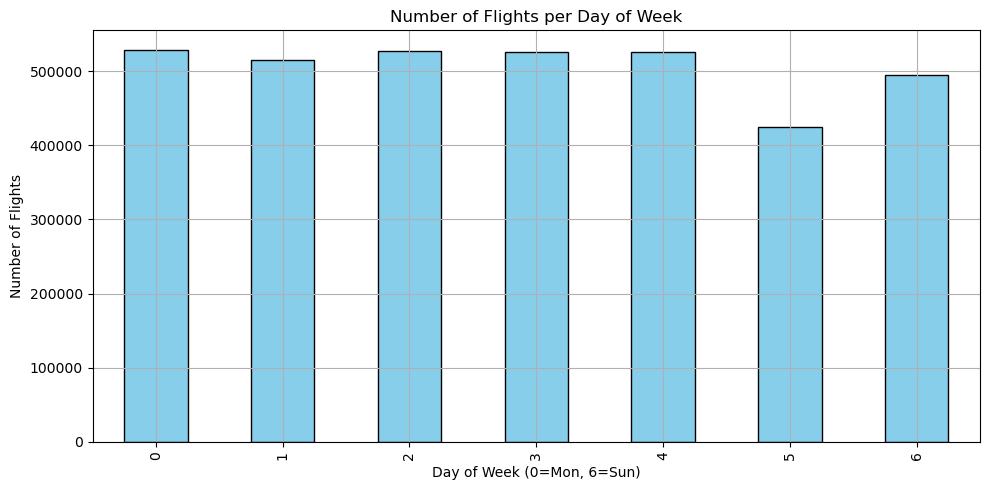

In [35]:
# Day of week (0=Monday, 6=Sunday)
df_viz["day_of_week"] = df_viz["FL_DATE"].dt.dayofweek
dow_flights = df_viz.groupby("day_of_week").size()

plt.figure(figsize=(10, 5))
dow_flights.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Flights per Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/solvibjornsson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/solvibjornsson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


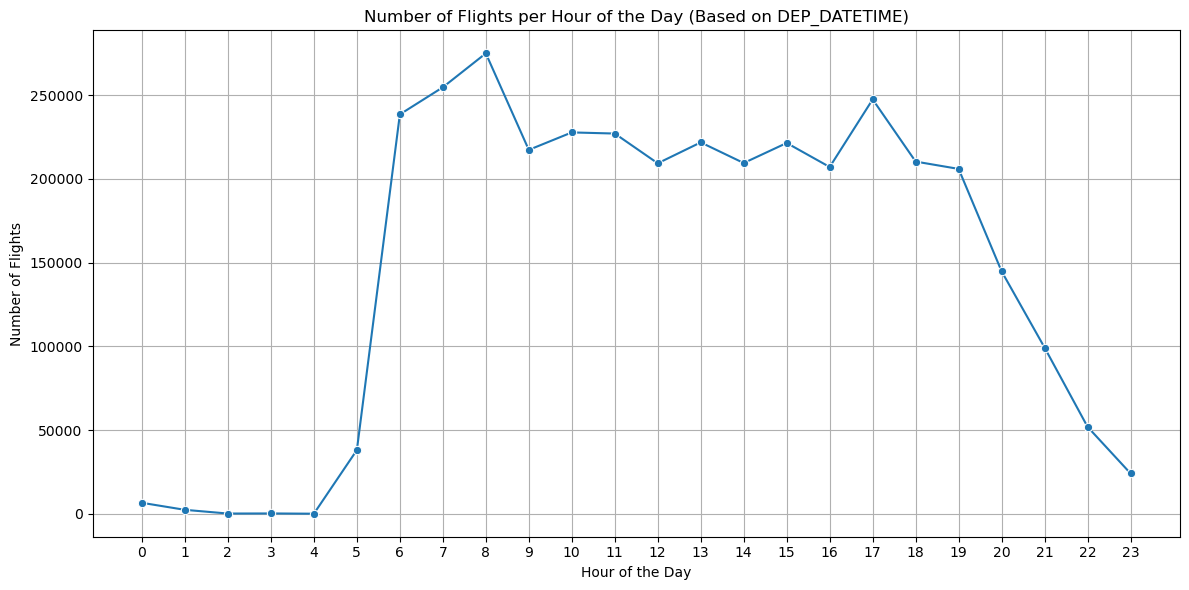

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour from departure datetime
df_viz["DEP_HOUR"] = df_viz["CRS_DEP_DATETIME"].dt.hour

# Calculate flight counts per hour
hourly_counts = df_viz["DEP_HOUR"].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Number of Flights per Hour of the Day (Based on DEP_DATETIME)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


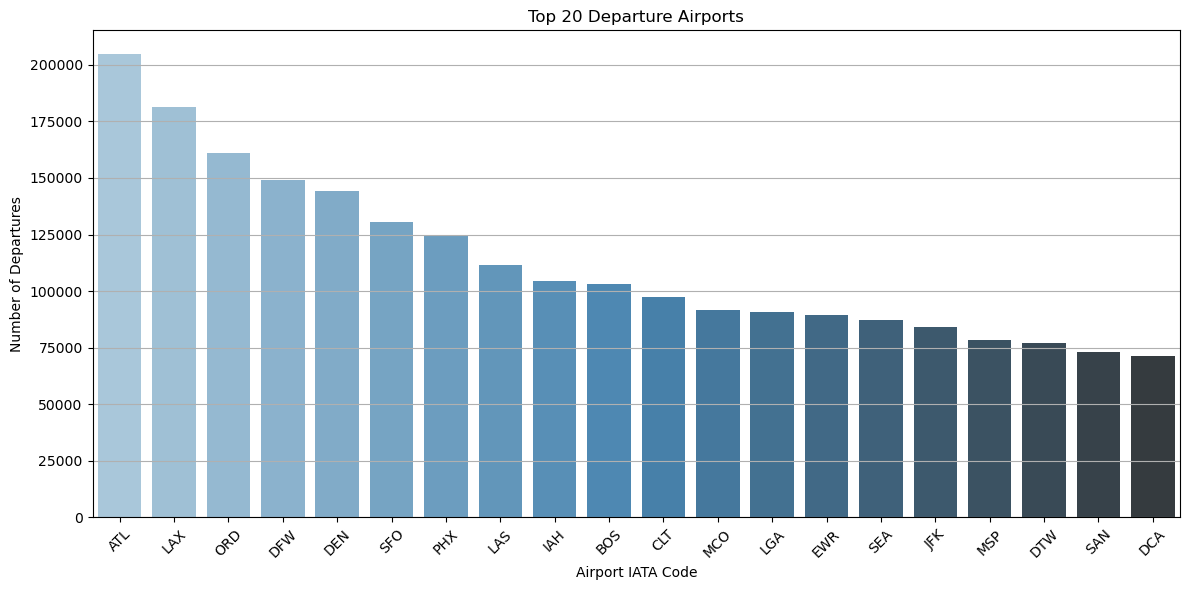

In [37]:
# Count number of departures per airport
top_departure_airports = df_viz["ORIGIN"].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_departure_airports.index, y=top_departure_airports.values, palette="Blues_d")
plt.title("Top 20 Departure Airports")
plt.xlabel("Airport IATA Code")
plt.ylabel("Number of Departures")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


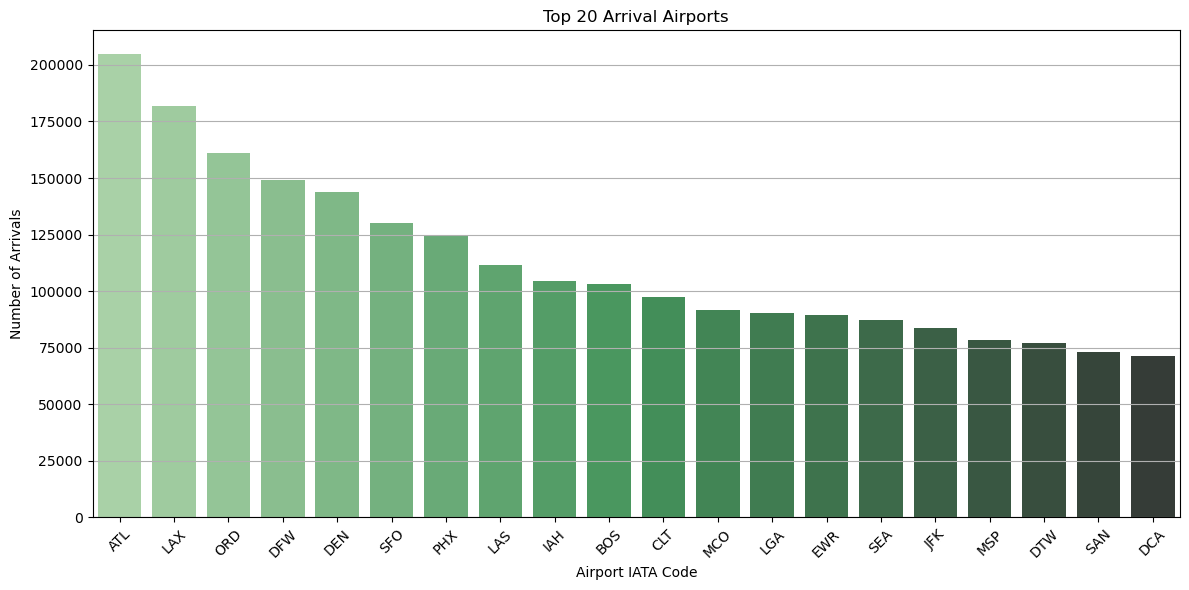

In [38]:
# Count number of arrivals per airport
top_arrival_airports = df_viz["DEST"].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_arrival_airports.index, y=top_arrival_airports.values, palette="Greens_d")
plt.title("Top 20 Arrival Airports")
plt.xlabel("Airport IATA Code")
plt.ylabel("Number of Arrivals")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


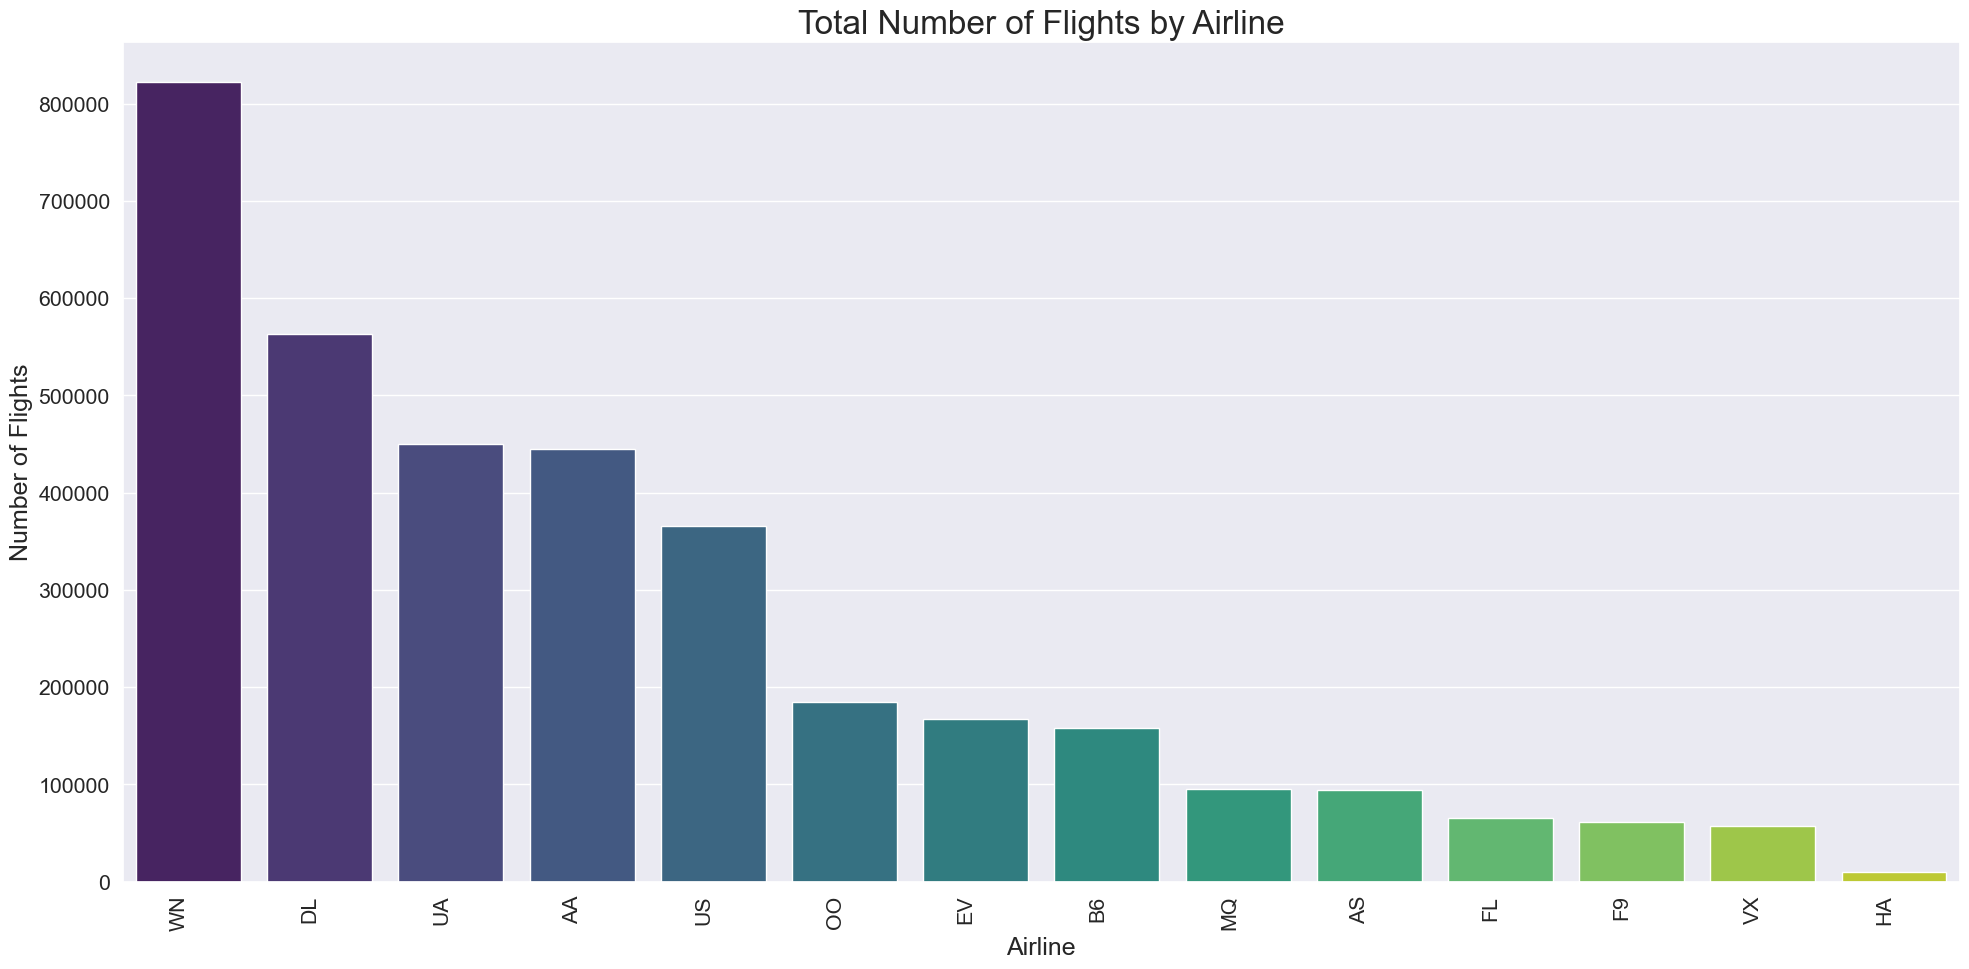

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.4)

# Countplot for top 18 airlines
top_airlines = df_viz["OP_CARRIER"].value_counts().iloc[:18].index
axis = sns.countplot(
    data=df_viz,
    x="OP_CARRIER",
    order=top_airlines,
    palette="viridis"
)

# Format axes
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Total Number of Flights by Airline', fontsize=24)
plt.xlabel('Airline', fontsize=18)
plt.ylabel('Number of Flights', fontsize=18)
plt.tight_layout()
plt.show()


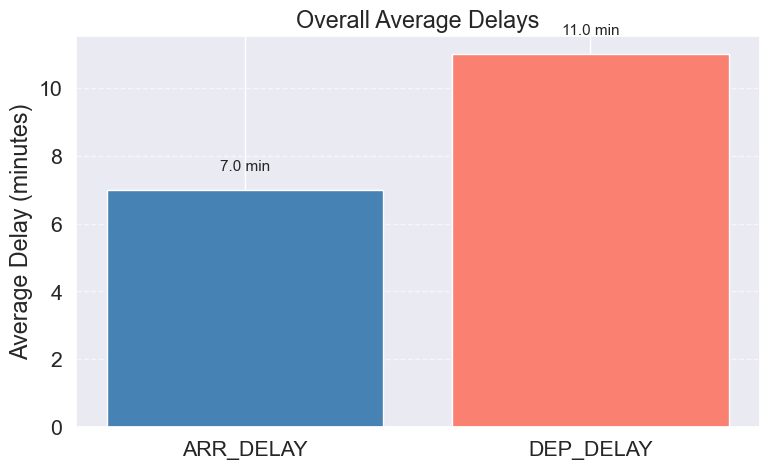

In [40]:
import matplotlib.pyplot as plt

# Step 1: Delay columns
delay_columns = ["DEP_DELAY", "ARR_DELAY"]

# Step 2: Compute overall average
overall_avg_delays = df_viz[delay_columns].mean().sort_values()

# Step 3: Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(overall_avg_delays.index, overall_avg_delays.values, color=["steelblue", "salmon"])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f} min", ha='center', va='bottom', fontsize=11)

# Styling
plt.title("Overall Average Delays")
plt.ylabel("Average Delay (minutes)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


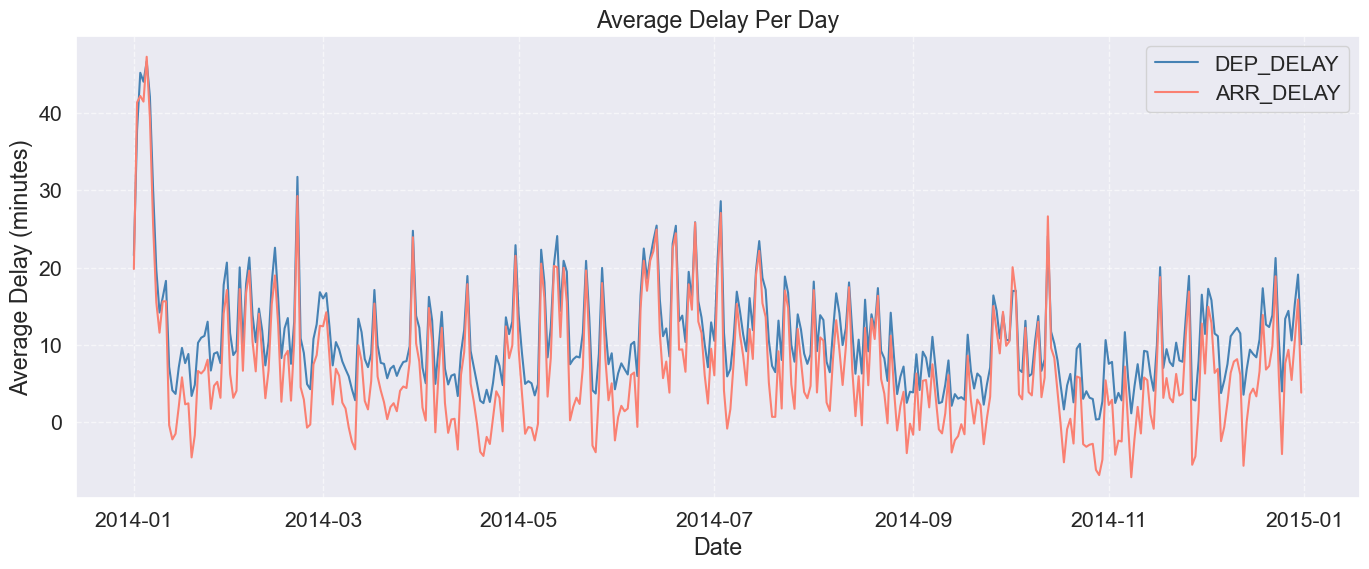

In [41]:
# Step 1: Extract flight date
df_viz["flight_date"] = df_viz["FL_DATE"]

# Step 2: Compute daily average
daily_avg = df_viz.groupby("flight_date")[["DEP_DELAY", "ARR_DELAY"]].mean().reset_index()

# Step 3: Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_avg["flight_date"], daily_avg["DEP_DELAY"], label="DEP_DELAY", color="steelblue")
plt.plot(daily_avg["flight_date"], daily_avg["ARR_DELAY"], label="ARR_DELAY", color="salmon")
plt.title("Average Delay Per Day")
plt.xlabel("Date")
plt.ylabel("Average Delay (minutes)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


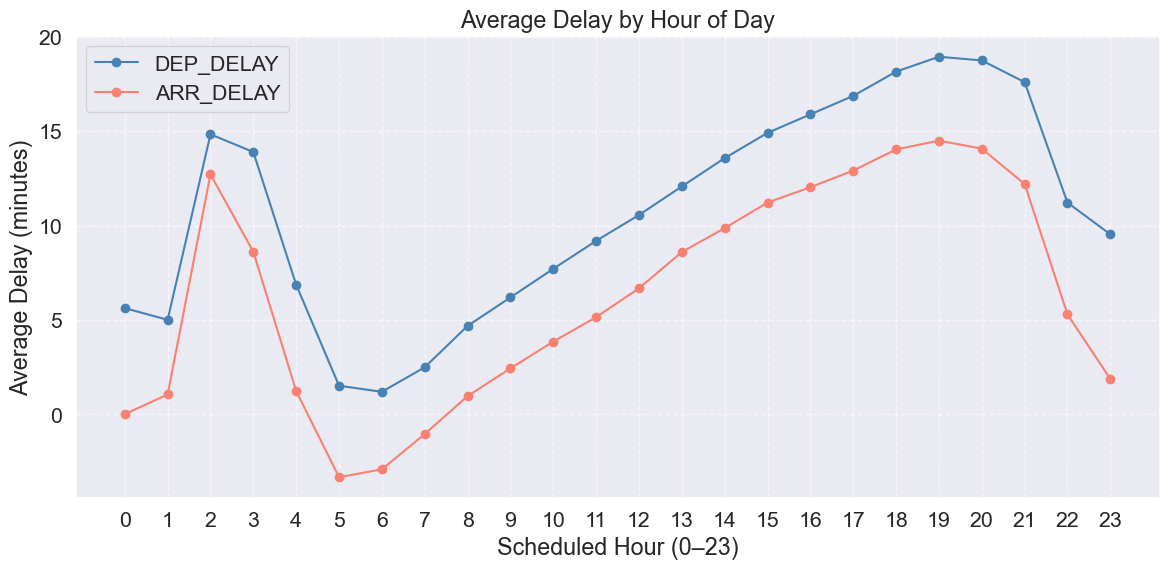

In [42]:
# Extract scheduled hour
df_viz["scheduled_hour"] = df_viz["CRS_DEP_TIME"].apply(lambda t: t.hour if pd.notna(t) else None)

# Average delay by hour
hourly_avg = df_viz.groupby("scheduled_hour")[["DEP_DELAY", "ARR_DELAY"]].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg["DEP_DELAY"], label="DEP_DELAY", color="steelblue", marker="o")
plt.plot(hourly_avg.index, hourly_avg["ARR_DELAY"], label="ARR_DELAY", color="salmon", marker="o")
plt.title("Average Delay by Hour of Day")
plt.xlabel("Scheduled Hour (0–23)")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


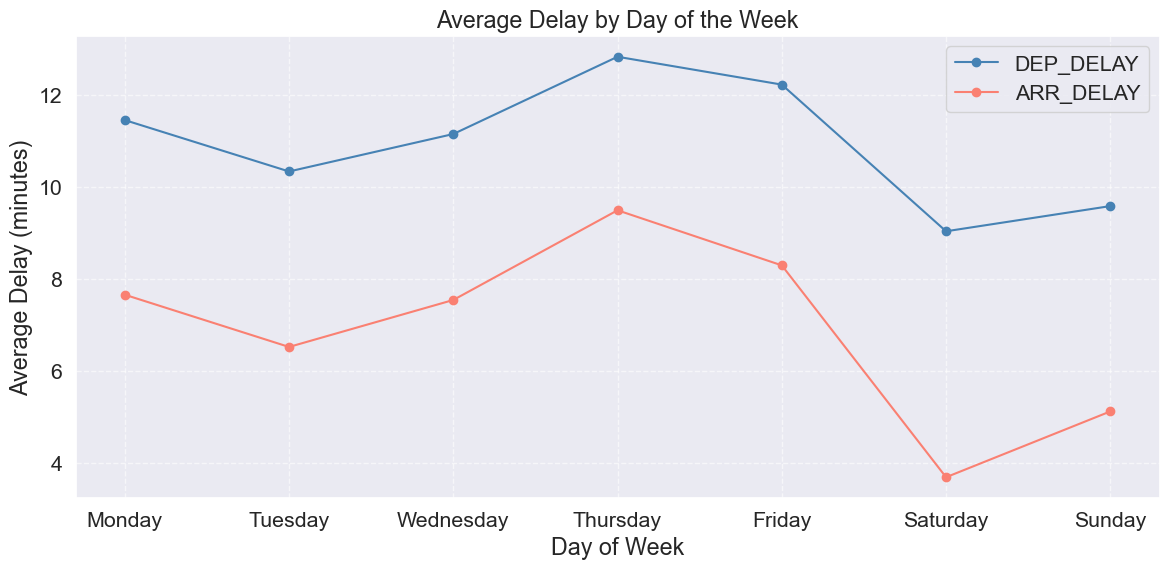

In [43]:
# Extract weekday name
df_viz["weekday"] = df_viz["FL_DATE"].dt.day_name()

# Compute averages
weekday_avg = df_viz.groupby("weekday")[["DEP_DELAY", "ARR_DELAY"]].mean()

# Reorder weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_avg = weekday_avg.reindex(weekday_order)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(weekday_avg.index, weekday_avg["DEP_DELAY"], label="DEP_DELAY", color="steelblue", marker="o")
plt.plot(weekday_avg.index, weekday_avg["ARR_DELAY"], label="ARR_DELAY", color="salmon", marker="o")
plt.title("Average Delay by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Delay (minutes)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


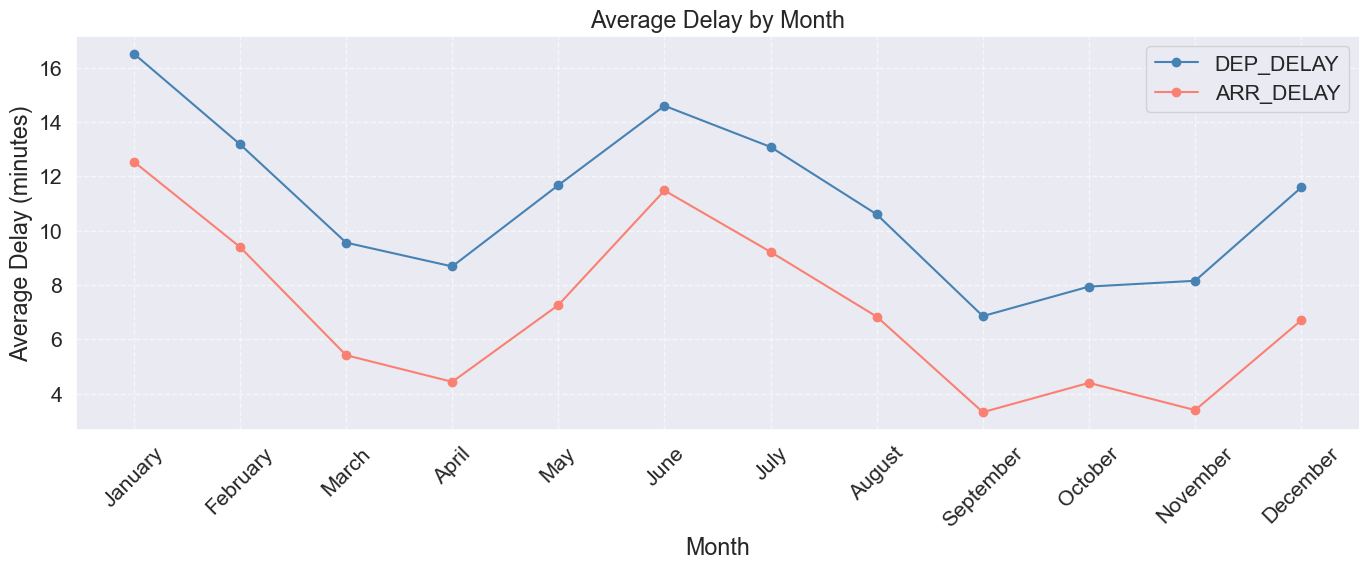

In [44]:
# Extract month name
df_viz["month"] = df_viz["FL_DATE"].dt.month_name()

# Compute averages
monthly_avg = df_viz.groupby("month")[["DEP_DELAY", "ARR_DELAY"]].mean()

# Reorder months
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_avg = monthly_avg.reindex(month_order)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg.index, monthly_avg["DEP_DELAY"], label="DEP_DELAY", color="steelblue", marker="o")
plt.plot(monthly_avg.index, monthly_avg["ARR_DELAY"], label="ARR_DELAY", color="salmon", marker="o")
plt.title("Average Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


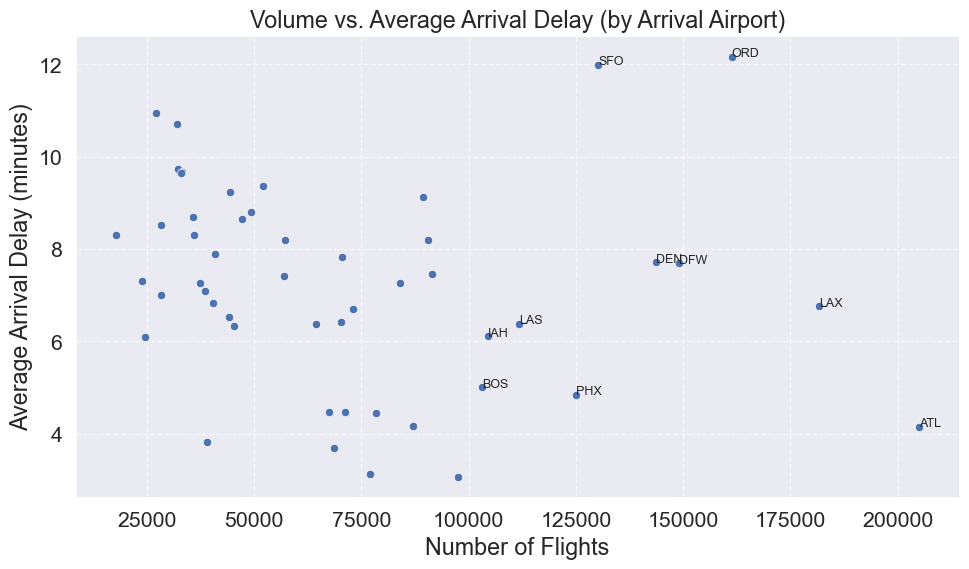

In [45]:
# Group by destination airport (you can use ORIGIN if preferred)
volume_vs_delay = df_viz.groupby("DEST").agg(
    num_flights=("DEST", "count"),
    avg_arr_delay=("ARR_DELAY", "mean")
).reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=volume_vs_delay, x="num_flights", y="avg_arr_delay")

# Annotate top points (optional)
top_airports = volume_vs_delay.sort_values(by="num_flights", ascending=False).head(10)
for _, row in top_airports.iterrows():
    plt.text(row["num_flights"], row["avg_arr_delay"], row["DEST"], fontsize=9)

plt.title("Volume vs. Average Arrival Delay (by Arrival Airport)")
plt.xlabel("Number of Flights")
plt.ylabel("Average Arrival Delay (minutes)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



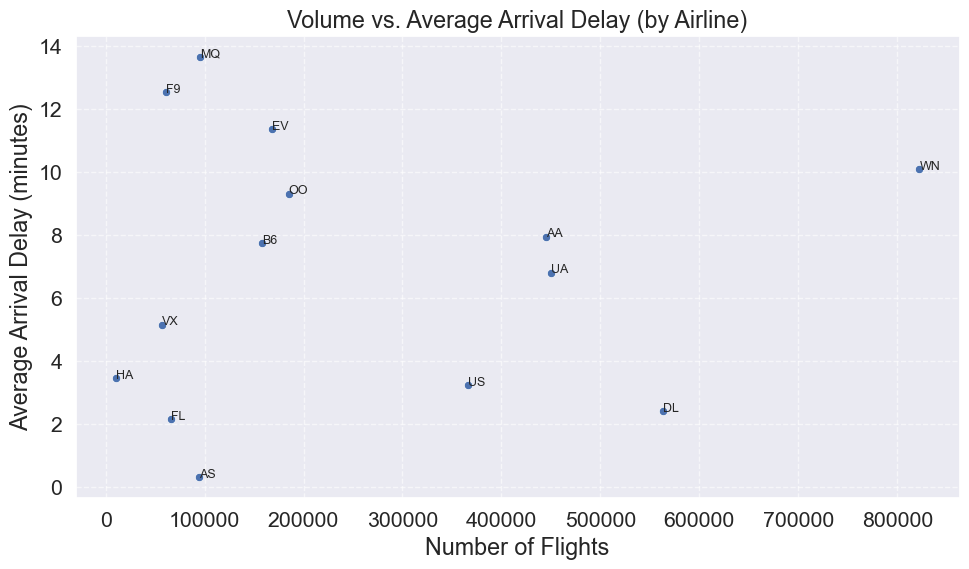

In [46]:
# Group by airline
volume_vs_delay_airline = df_viz.groupby("OP_CARRIER").agg(
    num_flights=("OP_CARRIER", "count"),
    avg_arr_delay=("ARR_DELAY", "mean")
).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=volume_vs_delay_airline, x="num_flights", y="avg_arr_delay")

# Annotate
for _, row in volume_vs_delay_airline.iterrows():
    plt.text(row["num_flights"], row["avg_arr_delay"], row["OP_CARRIER"], fontsize=9)

plt.title("Volume vs. Average Arrival Delay (by Airline)")
plt.xlabel("Number of Flights")
plt.ylabel("Average Arrival Delay (minutes)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [47]:
df_viz.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'FL_YEAR', 'FL_MONTH', 'FL_DAY', 'CRS_DEP_DATETIME', 'CRS_ARR_DATETIME',
       'CRS_DEP_year', 'CRS_DEP_MONTH', 'CRS_DEP_WEEKDAY', 'CRS_DEP_HOUR',
       'CRS_DEP_MINUTE', 'CRS_ARR_year', 'CRS_ARR_MONTH', 'CRS_ARR_WEEKDAY',
       'CRS_ARR_HOUR', 'CRS_ARR_MINUTE', 'day_of_week', 'DEP_HOUR',
       'flight_date', 'scheduled_hour', 'weekday', 'month'],
      dtype='object')

In [48]:
df_viz.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ARR_MONTH,CRS_ARR_WEEKDAY,CRS_ARR_HOUR,CRS_ARR_MINUTE,day_of_week,DEP_HOUR,flight_date,scheduled_hour,weekday,month
0,2014-01-01,AA,2378,MIA,TPA,22:25:00,22:20:00,-5.0,14.0,22:34:00,...,1,2,23,25,2,22,2014-01-01,22,Wednesday,January
1,2014-01-01,EV,2500,DFW,HOU,21:05:00,NaT,NaN,NaN,NaT,...,1,2,22,5,2,21,2014-01-01,21,Wednesday,January
2,2014-01-01,EV,2509,DFW,HOU,16:50:00,16:54:00,4.0,14.0,17:08:00,...,1,2,17,55,2,16,2014-01-01,16,Wednesday,January
3,2014-01-01,EV,2509,HOU,DFW,18:25:00,NaT,NaN,NaN,NaT,...,1,2,19,35,2,18,2014-01-01,18,Wednesday,January
4,2014-01-01,EV,2564,DFW,HOU,13:00:00,13:37:00,37.0,11.0,13:48:00,...,1,2,14,5,2,13,2014-01-01,13,Wednesday,January


# Graphs

In [49]:
df_graph = df_cleaned.copy()
df_graph.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_DEP_year,CRS_DEP_MONTH,CRS_DEP_WEEKDAY,CRS_DEP_HOUR,CRS_DEP_MINUTE,CRS_ARR_year,CRS_ARR_MONTH,CRS_ARR_WEEKDAY,CRS_ARR_HOUR,CRS_ARR_MINUTE
0,2014-01-01,AA,2378,MIA,TPA,22:25:00,22:20:00,-5.0,14.0,22:34:00,...,2014,1,2,22,25,2014,1,2,23,25
1,2014-01-01,EV,2500,DFW,HOU,21:05:00,NaT,NaN,NaN,NaT,...,2014,1,2,21,5,2014,1,2,22,5
2,2014-01-01,EV,2509,DFW,HOU,16:50:00,16:54:00,4.0,14.0,17:08:00,...,2014,1,2,16,50,2014,1,2,17,55
3,2014-01-01,EV,2509,HOU,DFW,18:25:00,NaT,NaN,NaN,NaT,...,2014,1,2,18,25,2014,1,2,19,35
4,2014-01-01,EV,2564,DFW,HOU,13:00:00,13:37:00,37.0,11.0,13:48:00,...,2014,1,2,13,0,2014,1,2,14,5


In [51]:
# gather airports data

df_airports = pd.read_csv("../CSV/airports.csv")
df_airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


In [52]:
# Step 1: Extract airport coordinates
df_coords = df_airports[['iata_code', 'latitude_deg', 'longitude_deg']].dropna()
df_coords.columns = ['IATA', 'LAT', 'LON']  # Rename for merging

# Step 2: Merge with origin coordinates
df_graph = df_graph.merge(df_coords, left_on='ORIGIN', right_on='IATA', how='left')
df_graph.rename(columns={'LAT': 'ORIGIN_LAT', 'LON': 'ORIGIN_LON'}, inplace=True)
df_graph.drop(columns='IATA', inplace=True)

# Step 3: Merge with destination coordinates
df_graph = df_graph.merge(df_coords, left_on='DEST', right_on='IATA', how='left')
df_graph.rename(columns={'LAT': 'DEST_LAT', 'LON': 'DEST_LON'}, inplace=True)
df_graph.drop(columns='IATA', inplace=True)

df_graph.head()



,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_DEP_MINUTE,CRS_ARR_year,CRS_ARR_MONTH,CRS_ARR_WEEKDAY,CRS_ARR_HOUR,CRS_ARR_MINUTE,ORIGIN_LAT,ORIGIN_LON,DEST_LAT,DEST_LON
0,2014-01-01,AA,2378,MIA,TPA,22:25:00,22:20:00,-5.0,14.0,22:34:00,...,25,2014,1,2,23,25,25.793200,-80.290604,27.975500,-82.533203
1,2014-01-01,EV,2500,DFW,HOU,21:05:00,NaT,NaN,NaN,NaT,...,5,2014,1,2,22,5,32.896801,-97.038002,29.645399,-95.278900
2,2014-01-01,EV,2509,DFW,HOU,16:50:00,16:54:00,4.0,14.0,17:08:00,...,50,2014,1,2,17,55,32.896801,-97.038002,29.645399,-95.278900
3,2014-01-01,EV,2509,HOU,DFW,18:25:00,NaT,NaN,NaN,NaT,...,25,2014,1,2,19,35,29.645399,-95.278900,32.896801,-97.038002
4,2014-01-01,EV,2564,DFW,HOU,13:00:00,13:37:00,37.0,11.0,13:48:00,...,0,2014,1,2,14,5,32.896801,-97.038002,29.645399,-95.278900


# Flight predictions

In [53]:
df_predictions = df_graph.copy()
df_predictions

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_DEP_MINUTE,CRS_ARR_year,CRS_ARR_MONTH,CRS_ARR_WEEKDAY,CRS_ARR_HOUR,CRS_ARR_MINUTE,ORIGIN_LAT,ORIGIN_LON,DEST_LAT,DEST_LON
0,2014-01-01,AA,2378,MIA,TPA,22:25:00,22:20:00,-5.0,14.0,22:34:00,...,25,2014,1,2,23,25,25.793200,-80.290604,27.975500,-82.533203
1,2014-01-01,EV,2500,DFW,HOU,21:05:00,NaT,NaN,NaN,NaT,...,5,2014,1,2,22,5,32.896801,-97.038002,29.645399,-95.278900
2,2014-01-01,EV,2509,DFW,HOU,16:50:00,16:54:00,4.0,14.0,17:08:00,...,50,2014,1,2,17,55,32.896801,-97.038002,29.645399,-95.278900
3,2014-01-01,EV,2509,HOU,DFW,18:25:00,NaT,NaN,NaN,NaT,...,25,2014,1,2,19,35,29.645399,-95.278900,32.896801,-97.038002
4,2014-01-01,EV,2564,DFW,HOU,13:00:00,13:37:00,37.0,11.0,13:48:00,...,0,2014,1,2,14,5,32.896801,-97.038002,29.645399,-95.278900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541990,2014-12-31,MQ,3535,JFK,CMH,19:00:00,18:52:00,-8.0,13.0,19:05:00,...,0,2014,12,2,20,53,40.639447,-73.779317,39.998001,-82.891899
3541991,2014-12-31,MQ,3536,LGA,RDU,15:00:00,14:52:00,-8.0,19.0,15:11:00,...,0,2014,12,2,16,43,40.777199,-73.872597,35.877602,-78.787498
3541992,2014-12-31,MQ,3541,CLE,ORD,17:35:00,19:33:00,118.0,7.0,19:40:00,...,35,2014,12,2,18,10,41.411701,-81.849800,41.978600,-87.904800
3541993,2014-12-31,MQ,3552,RDU,LGA,06:40:00,06:35:00,-5.0,37.0,07:12:00,...,40,2014,12,2,8,20,35.877602,-78.787498,40.777199,-73.872597


In [54]:
df_predictions = df_predictions.sort_values(by="CRS_DEP_DATETIME", ascending=True)
df_predictions

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_DEP_MINUTE,CRS_ARR_year,CRS_ARR_MONTH,CRS_ARR_WEEKDAY,CRS_ARR_HOUR,CRS_ARR_MINUTE,ORIGIN_LAT,ORIGIN_LON,DEST_LAT,DEST_LON
4553,2014-01-01,US,1830,SEA,CLT,00:10:00,00:04:00,-6.0,15.0,00:19:00,...,10,2014,1,2,8,1,47.447943,-122.310276,35.214001,-80.943100
6074,2014-01-01,AA,1052,SFO,DFW,00:20:00,00:20:00,0.0,15.0,00:35:00,...,20,2014,1,2,5,35,37.619806,-122.374821,32.896801,-97.038002
4630,2014-01-01,US,1899,SFO,CLT,00:20:00,00:18:00,-2.0,12.0,00:30:00,...,20,2014,1,2,8,7,37.619806,-122.374821,35.214001,-80.943100
5152,2014-01-01,UA,1197,SFO,IAH,00:23:00,00:37:00,14.0,14.0,00:51:00,...,23,2014,1,2,6,10,37.619806,-122.374821,29.984400,-95.341400
7901,2014-01-01,DL,1110,PHX,DTW,00:25:00,00:22:00,-3.0,14.0,00:36:00,...,25,2014,1,2,6,3,33.435302,-112.005905,42.213770,-83.353786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541737,2014-12-31,F9,422,DEN,ATL,23:59:00,00:34:00,35.0,9.0,00:43:00,...,59,2015,1,3,4,41,39.861698,-104.672997,33.636700,-84.428101
3541558,2014-12-31,F9,300,DEN,TPA,23:59:00,00:17:00,18.0,18.0,00:35:00,...,59,2015,1,3,5,11,39.861698,-104.672997,27.975500,-82.533203
3536519,2014-12-31,UA,1124,IAH,SJU,23:59:00,23:58:00,-1.0,14.0,00:12:00,...,59,2015,1,3,6,14,29.984400,-95.341400,18.439400,-66.001801
3535511,2014-12-31,B6,1503,JFK,SJU,23:59:00,00:22:00,23.0,21.0,00:43:00,...,59,2015,1,3,4,40,40.639447,-73.779317,18.439400,-66.001801


# Add weather data

To improve **flight delay predictions**, we have collected **hourly historical weather data** from **Open-Meteo** 

**Data Source**
- Provider: [Open-Meteo](https://open-meteo.com/)
- API Used: Open-Meteo Historical Weather API




### Weather Variables
| **Feature** | **Description** | **Unit** |
|------------|----------------|----------|
| `date` | Timestamp (UTC) | Datetime |
| `temperature_2m` | Air temperature at 2 meters | °C |
| `wind_gusts_10m` | Wind gust speed at 10m | km/h |
| `wind_speed_100m` | Sustained wind speed at 100m | km/h |
| `wind_speed_10m` | Sustained wind speed at 10m | km/h |
| `precipitation` | Total precipitation (rain + snow) | mm |
| `snowfall` | Snow accumulation per hour | mm |
| `rain` | Rainfall per hour | mm |
| `weather_code` | Encoded weather condition (clear, rain, fog, snow, etc.) | Code |
| `cloud_cover` | Percentage of sky covered by clouds | % |
| `relative_humidity_2m` | Humidity at 2 meters | % |
| `dew_point_2m` | Temperature at which condensation occurs | °C |
| `pressure_msl` | Mean sea level pressure | hPa |


### Why This Data Matters for Flight Delays
- Wind Speed & Gusts: High winds affect aircraft stability during takeoff & landing.  
- Precipitation & Snowfall: Rain & snow can lead to de-icing delays & reduced visibility.  
- Cloud Cover & Visibility: Low visibility leads to longer taxi & approach times.  
- Pressure & Temperature: Low pressure indicates storms, temperature affects aircraft performance.  

In [55]:
df_network = df_predictions

6140+1573

In [56]:
airport_coords = pd.concat([
    df_network[["ORIGIN", "ORIGIN_LAT", "ORIGIN_LON"]]
        .rename(columns={"ORIGIN": "IATA", "ORIGIN_LAT": "LAT", "ORIGIN_LON": "LON"}),
    df_network[["DEST", "DEST_LAT", "DEST_LON"]]
        .rename(columns={"DEST": "IATA", "DEST_LAT": "LAT", "DEST_LON": "LON"})
]).drop_duplicates(subset="IATA").set_index("IATA")



In [57]:
import sys
print(sys.executable)


/Users/solvibjornsson/anaconda3/bin/python


In [58]:
from meteostat import Hourly, Stations

In [59]:
df_network["CRS_DEP_DATETIME"] = pd.to_datetime(df_network["CRS_DEP_DATETIME"])
df_network["CRS_ARR_DATETIME"] = pd.to_datetime(df_network["CRS_ARR_DATETIME"])

In [60]:
import os
import shutil

cache_dir = os.path.expanduser("~/.meteostat/cache")
shutil.rmtree(cache_dir, ignore_errors=True)


In [61]:
from meteostat import Hourly, Stations
from datetime import datetime
import pandas as pd
from tqdm import tqdm


# Step 1: Setup airport coordinate mapping
airport_coords = (
    pd.concat([
        df_network[["ORIGIN", "ORIGIN_LAT", "ORIGIN_LON"]].rename(columns={"ORIGIN": "IATA", "ORIGIN_LAT": "LAT", "ORIGIN_LON": "LON"}),
        df_network[["DEST", "DEST_LAT", "DEST_LON"]].rename(columns={"DEST": "IATA", "DEST_LAT": "LAT", "DEST_LON": "LON"})
    ])
    .drop_duplicates(subset="IATA")
    .set_index("IATA")
)


# Step 2: Define your date range
start = df_network["CRS_DEP_DATETIME"].min().to_pydatetime()    
end = df_network["CRS_ARR_DATETIME"].max().to_pydatetime()

# Step 3: Weather collection loop
weather_dict = {}
for airport in tqdm(airport_coords.index):
    lat = airport_coords.loc[airport, "LAT"]
    lon = airport_coords.loc[airport, "LON"]
    
    # Find nearest weather station
    station = Stations().nearby(lat, lon).fetch(1)
    
    # Fetch hourly data
    try:
        data = Hourly(station, start, end).fetch()
        if not data.empty:
            data.reset_index(inplace=True)
            data["airport"] = airport
            weather_dict[airport] = data
    except Exception as e:
        print(f"Failed for {airport}: {e}")



100%|██████████| 50/50 [00:57<00:00,  1.15s/it]


In [62]:
df_weather_all = pd.concat(weather_dict.values(), ignore_index=True)
df_weather_all.head()



,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,airport
0,2014-01-01 01:00:00,7.8,5.6,89.0,0.0,<NA>,0.0,0.0,<NA>,1028.2,<NA>,<NA>,SEA
1,2014-01-01 02:00:00,7.8,5.0,86.0,0.0,<NA>,0.0,0.0,<NA>,1028.5,<NA>,<NA>,SEA
2,2014-01-01 03:00:00,7.8,5.0,86.0,0.0,<NA>,0.0,0.0,<NA>,1028.6,<NA>,<NA>,SEA
3,2014-01-01 04:00:00,7.2,5.2,90.0,0.0,<NA>,<NA>,5.4,<NA>,1028.8,<NA>,<NA>,SEA
4,2014-01-01 05:00:00,5.0,3.6,93.0,0.0,<NA>,0.0,0.0,<NA>,1029.1,<NA>,<NA>,SEA


In [63]:
df_weather_all.drop(columns="coco")

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,airport
0,2014-01-01 01:00:00,7.8,5.6,89.0,0.0,<NA>,0.0,0.0,<NA>,1028.2,<NA>,SEA
1,2014-01-01 02:00:00,7.8,5.0,86.0,0.0,<NA>,0.0,0.0,<NA>,1028.5,<NA>,SEA
2,2014-01-01 03:00:00,7.8,5.0,86.0,0.0,<NA>,0.0,0.0,<NA>,1028.6,<NA>,SEA
3,2014-01-01 04:00:00,7.2,5.2,90.0,0.0,<NA>,<NA>,5.4,<NA>,1028.8,<NA>,SEA
4,2014-01-01 05:00:00,5.0,3.6,93.0,0.0,<NA>,0.0,0.0,<NA>,1029.1,<NA>,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...
403432,2015-01-01 08:00:00,1.1,-3.1,79.0,0.5,<NA>,0.0,0.0,<NA>,1029.2,<NA>,DAL
403433,2015-01-01 09:00:00,1.1,-3.1,79.0,<NA>,<NA>,30.0,9.4,<NA>,1028.4,<NA>,DAL
403434,2015-01-01 10:00:00,0.6,-3.0,82.0,0.3,<NA>,80.0,9.4,<NA>,1026.9,<NA>,DAL
403435,2015-01-01 11:00:00,1.1,-3.1,79.0,<NA>,<NA>,10.0,9.4,<NA>,1027.4,<NA>,DAL


In [64]:
df_weather_all.drop(columns=["tsun","coco", "snow","wpgt"], inplace=True)

In [65]:
# Fill amounts with 0 (safe)
df_weather_all["prcp"] = df_weather_all["prcp"].fillna(0)

# Fill direction/speed with forward-fill or interpolation
df_weather_all["wspd"] = df_weather_all["wspd"].fillna(0)  # Optional: use ffill
df_weather_all["wdir"] = df_weather_all["wdir"].fillna(method="ffill")

# Interpolate temperature-related data
df_weather_all["temp"] = df_weather_all["temp"].interpolate()
df_weather_all["dwpt"] = df_weather_all["dwpt"].interpolate()
df_weather_all["rhum"] = df_weather_all["rhum"].interpolate()
df_weather_all["pres"] = df_weather_all["pres"].interpolate()

# Fill weather code with mode
#df_weather_all["coco"] = df_weather_all["coco"].fillna(df_weather_all["coco"].mode()[0])


In [66]:
df_network.to_csv("../CSV/network_weather_2014.csv", index=False)


In [67]:
len(df_network)

3541995